<a href="https://colab.research.google.com/github/UEES-IA-Grupo1/UEES-IA-GRUPO1-SEMANA-1/blob/main/03_Machine_Learning_Basico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print("GPU disponible:", tf.config.list_physical_devices('GPU'))

!pip install seaborn plotly -q

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    mean_squared_error, r2_score
)
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

print("Entorno configurado correctamente en Google Colab")


GPU disponible: []
Entorno configurado correctamente en Google Colab


# 03 - Machine Learning Básico

## 1. Introducción
En este notebook se construyen modelos supervisados de clasificación y regresión
usando Scikit-learn, evaluando su desempeño con métricas estándar.

## 2. Clasificación supervisada
- Dataset Iris
- Dataset Wine
- Dataset Digits

## 3. Regresión supervisada
- Dataset sintético tipo “housing”

## 4. Comparación de modelos y métricas

## 5. Conclusiones


## 2.1 Clasificación multiclase con Iris (Logistic Regression)


In [2]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

# Cargar dataset
iris = load_iris()
X = iris.data
y = iris.target

# División train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Modelo
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)

# Predicciones
y_pred = log_reg.predict(X_test)

print("Accuracy Iris (LogReg):", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:\n")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


Accuracy Iris (LogReg): 0.9666666666666667

Reporte de clasificación:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



Se entrena un modelo de **regresión logística** para clasificar las tres especies de Iris.
Se usa `train_test_split` con `stratify` para mantener la proporción de clases.


## 2.2 Clasificación de vinos (Random Forest)


In [3]:
from sklearn.datasets import load_wine
from sklearn.ensemble import RandomForestClassifier

wine = load_wine()
X_wine = wine.data
y_wine = wine.target

Xw_train, Xw_test, yw_train, yw_test = train_test_split(
    X_wine, y_wine, test_size=0.2, random_state=42, stratify=y_wine
)

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)
rf.fit(Xw_train, yw_train)

yw_pred = rf.predict(Xw_test)

print("Accuracy Wine (RandomForest):", accuracy_score(yw_test, yw_pred))
print("\nReporte de clasificación:\n")
print(classification_report(yw_test, yw_pred, target_names=wine.target_names))


Accuracy Wine (RandomForest): 1.0

Reporte de clasificación:

              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        12
     class_1       1.00      1.00      1.00        14
     class_2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



## 2.3 Reconocimiento de dígitos (SVM)


In [4]:
from sklearn.datasets import load_digits
from sklearn.svm import SVC

digits = load_digits()
X_digits = digits.data
y_digits = digits.target

Xd_train, Xd_test, yd_train, yd_test = train_test_split(
    X_digits, y_digits, test_size=0.2, random_state=42, stratify=y_digits
)

svc = SVC(kernel='rbf', gamma='scale')
svc.fit(Xd_train, yd_train)

yd_pred = svc.predict(Xd_test)

print("Accuracy Digits (SVM):", accuracy_score(yd_test, yd_pred))
print("\nReporte de clasificación:\n")
print(classification_report(yd_test, yd_pred))


Accuracy Digits (SVM): 0.9916666666666667

Reporte de clasificación:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.95      1.00      0.97        36
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        37
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        37
           6       1.00      1.00      1.00        36
           7       0.97      1.00      0.99        36
           8       1.00      0.94      0.97        35
           9       1.00      0.97      0.99        36

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



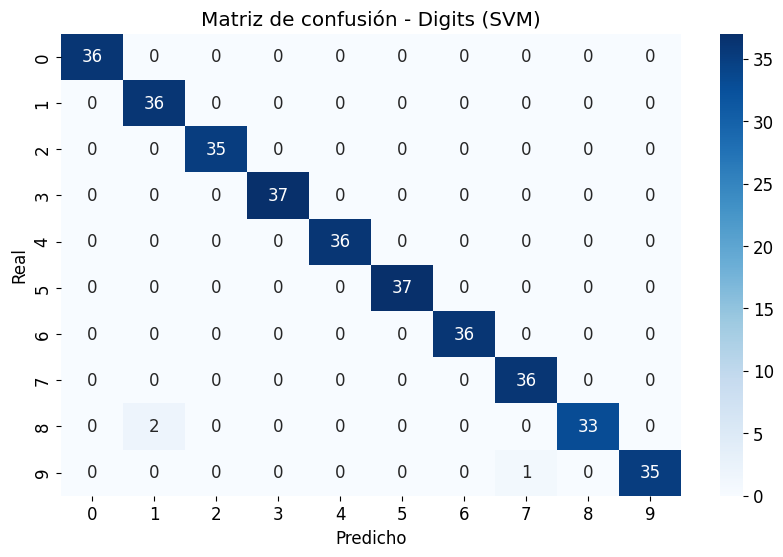

In [5]:
cm = confusion_matrix(yd_test, yd_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de confusión - Digits (SVM)")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.show()


## 3.1 Regresión lineal con dataset sintético tipo housing


In [6]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

# Dataset sintético
X_reg, y_reg = make_regression(
    n_samples=500,
    n_features=5,
    noise=15,
    random_state=42
)

Xr_train, Xr_test, yr_train, yr_test = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

reg = LinearRegression()
reg.fit(Xr_train, yr_train)

yr_pred = reg.predict(Xr_test)

mse = mean_squared_error(yr_test, yr_pred)
r2 = r2_score(yr_test, yr_pred)

print("MSE (Regresión):", mse)
print("R² (Regresión):", r2)


MSE (Regresión): 239.2312510505148
R² (Regresión): 0.9800454621057375


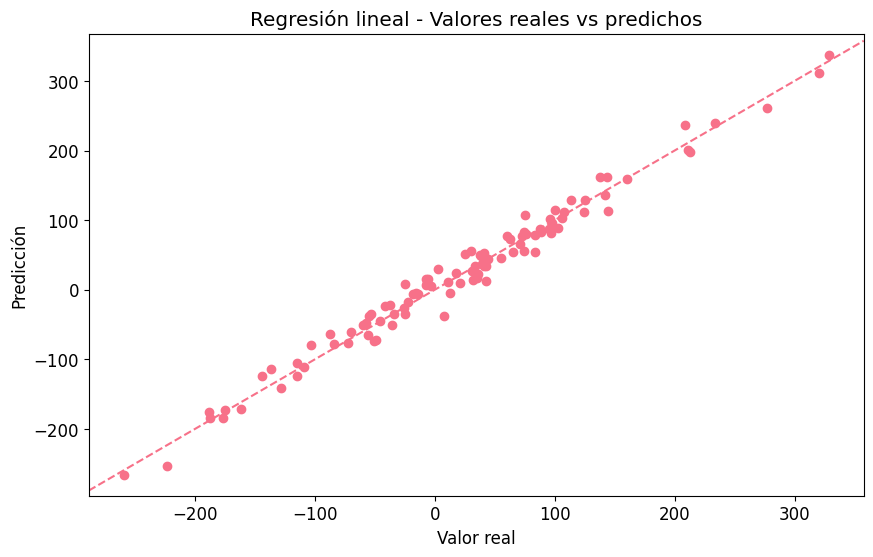

In [7]:
plt.scatter(yr_test, yr_pred)
plt.xlabel("Valor real")
plt.ylabel("Predicción")
plt.title("Regresión lineal - Valores reales vs predichos")
plt.axline((0, 0), slope=1, linestyle="--")
plt.show()


## 4. Comparación de modelos y métricas


In [8]:
resumen_modelos = pd.DataFrame([
    {"Modelo": "Iris - Logistic Regression", "Tipo": "Clasificación", "Métrica": "Accuracy", "Valor": accuracy_score(y_test, y_pred)},
    {"Modelo": "Wine - Random Forest",       "Tipo": "Clasificación", "Métrica": "Accuracy", "Valor": accuracy_score(yw_test, yw_pred)},
    {"Modelo": "Digits - SVM",               "Tipo": "Clasificación", "Métrica": "Accuracy", "Valor": accuracy_score(yd_test, yd_pred)},
    {"Modelo": "Regresión sintética - LinReg","Tipo": "Regresión",    "Métrica": "R²",       "Valor": r2}
])

resumen_modelos


,Modelo,Tipo,Métrica,Valor
0,Iris - Logistic Regression,Clasificación,Accuracy,0.966667
1,Wine - Random Forest,Clasificación,Accuracy,1.000000
2,Digits - SVM,Clasificación,Accuracy,0.991667
3,Regresión sintética - LinReg,Regresión,R²,0.980045


## 5. Conclusiones

En este notebook se implementaron modelos supervisados de:
- **Clasificación**: Iris (LogReg), Wine (RandomForest) y Digits (SVM).
- **Regresión**: modelo lineal sobre un dataset sintético tipo housing.

Se evaluaron con métricas estándar:
- Accuracy y reporte de clasificación en problemas de clasificación.
- MSE y R² en el problema de regresión.

Este flujo cubre un pipeline básico de Machine Learning en Scikit-learn:
carga de datos, división train/test, entrenamiento, predicción y evaluación.
